In [11]:
import numpy
import pandas
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [12]:
db = pandas.read_csv("./tokyo_clean.csv")

In [13]:
db1 = pandas.read_csv("./Crime_Data_LA_2024.csv")

In [14]:
db1

DR_NO        Date Rptd         DATE OCC  TIME OCC  AREA  \
0       251404027  12/30/2024 0:00  12/30/2024 0:00      2300    14   
1       251404034  12/31/2024 0:00  12/30/2024 0:00      2230    14   
2       240218331  12/30/2024 0:00  12/30/2024 0:00       645     2   
3       251404035  12/30/2024 0:00  12/30/2024 0:00      1720    14   
4       240317263  12/31/2024 0:00  12/30/2024 0:00      1830     3   
...           ...              ...              ...       ...   ...   
127520  241104022    1/1/2024 0:00    1/1/2024 0:00       150    11   
127521  241804480   1/10/2024 0:00    1/1/2024 0:00       145    18   
127522  240504085    1/1/2024 0:00    1/1/2024 0:00      1259     5   
127523  242004536    1/1/2024 0:00    1/1/2024 0:00       630    20   
127524  241304056    1/2/2024 0:00    1/1/2024 0:00      2100    13   

        AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0         Pacific         1494         1     761   
1         Pacific         1494         1     341   
2         Rampart          236         1     330   
3         Pacific         1494         1     341   
4       Southwest          327         1     510   
...           ...          ...       ...     ...   
127520  Northeast         1184         1     230   
127521  Southeast         1835         1     761   
127522     Harbor          569         2     740   
127523    Olympic         2025         1     330   
127524     Newton         1347         1     510   

                                              Crm Cd Desc  ... Status  \
0                                         BRANDISH WEAPON  ...     IC   
1       THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     IC   
2                                   BURGLARY FROM VEHICLE  ...     IC   
3       THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  ...     IC   
4                                        VEHICLE - STOLEN  ...     IC   
...                                                   ...  ...    ...   
127520     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
127521                                    BRANDISH WEAPON  ...     IC   
127522  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
127523                              BURGLARY FROM VEHICLE  ...     IC   
127524                                   VEHICLE - STOLEN  ...     IC   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0       Invest Cont      761      NaN       NaN      NaN   
1       Invest Cont      341      NaN       NaN      NaN   
2       Invest Cont      330      NaN       NaN      NaN   
3       Invest Cont      341      NaN       NaN      NaN   
4       Invest Cont      510      NaN       NaN      NaN   
...             ...      ...      ...       ...      ...   
127520  Invest Cont      230      NaN       NaN      NaN   
127521  Invest Cont      761      NaN       NaN      NaN   
127522  Invest Cont      740      NaN       NaN      NaN   
127523  Invest Cont      330      NaN       NaN      NaN   
127524  Invest Cont      510      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        9600    SKY                          WY          NaN  33.9457   
1         800    WORLD                        WY          NaN  33.9434   
2                                    BONNIE BRAE      BEVERLY  34.0656   
3         300    WORLD                        WY          NaN  33.9455   
4        1100 W  28TH                         ST          NaN  34.0294   
...                                          ...          ...      ...   
127520   1400 W  SUNSET                       BL          NaN  34.0812   
127521  10500    PACE                         AV          NaN  33.9410   
127522   2500    SIGNAL                       ST          NaN  33.7203   
127523    300 S  MARIPOSA                     AV          NaN  34.0690   
127524                                      41ST   LONG BEACH  34.0072   

             LON  
0      -118.3998  
1      -1

Seaborn is a Python data visualization library built on top of Matplotlib and closely integrated with Pandas. It provides high-level functions to create aesthetically pleasing and informative statistical graphics.

Website: https://seaborn.pydata.org/

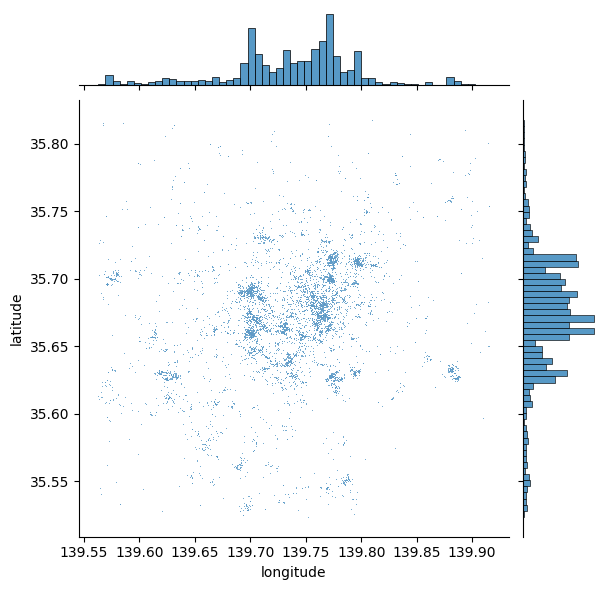

In [15]:
# Generate scatter plot
seaborn.jointplot(x="longitude", y="latitude", data=db, s=0.5);

contextily is a Python package used to add basemaps (background maps) to geospatial data visualizations in Matplotlib and Geopandas plots. It works by fetching web tiles from online map providers (e.g., OpenStreetMap, Stamen, Carto) and overlaying them onto geospatial plots.

Official Documentation: https://contextily.readthedocs.io/

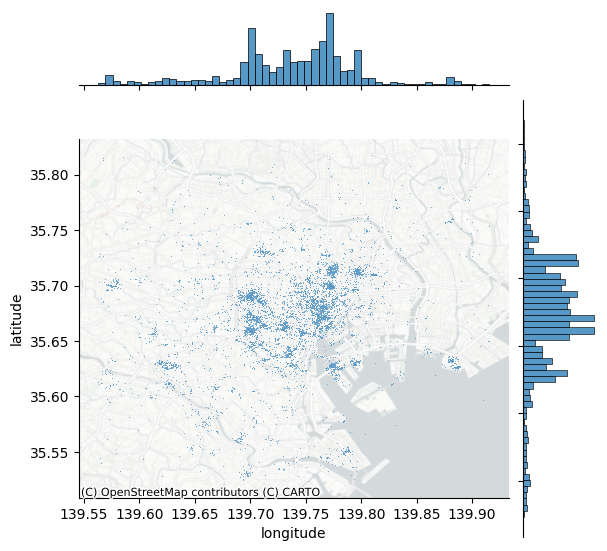

In [16]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="longitude", y="latitude", data=db, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

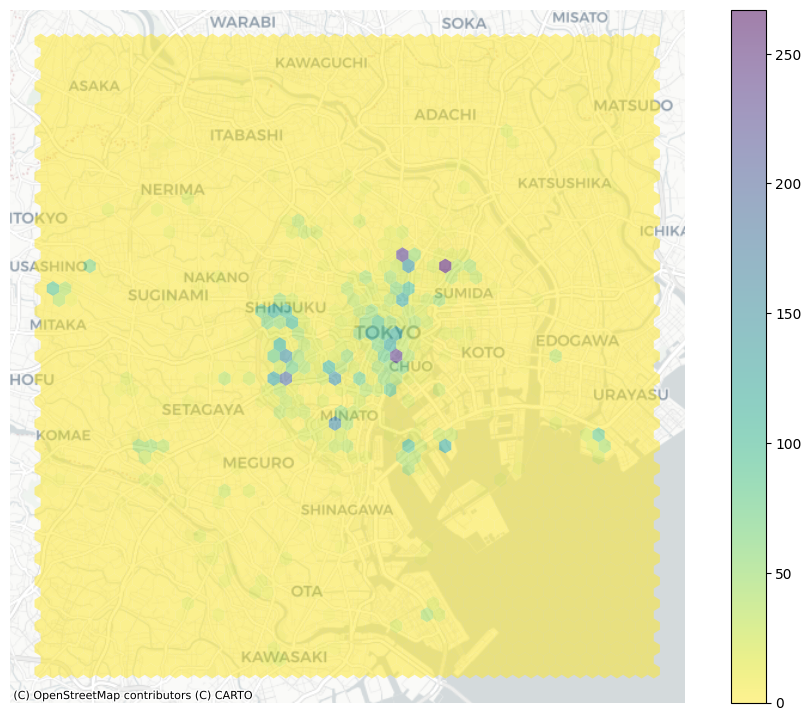

In [17]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db["x"],
    db["y"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

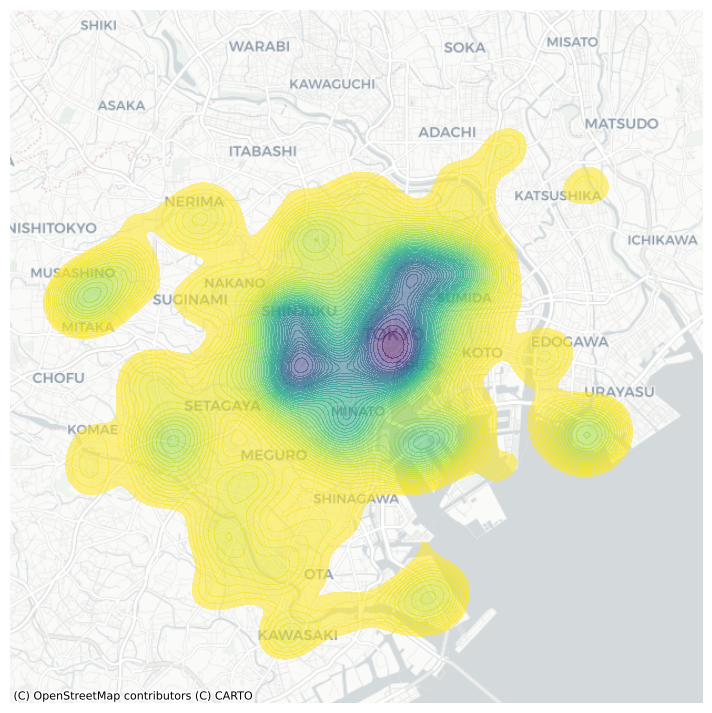

In [18]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x="x",
    y="y",
    data=db,
    n_levels=50,
    fill=True,
    alpha=0.55,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

In [19]:
from pointpats import centrography

In [20]:
mean_center = centrography.mean_center(db[["x", "y"]])
med_center = centrography.euclidean_median(db[["x", "y"]])

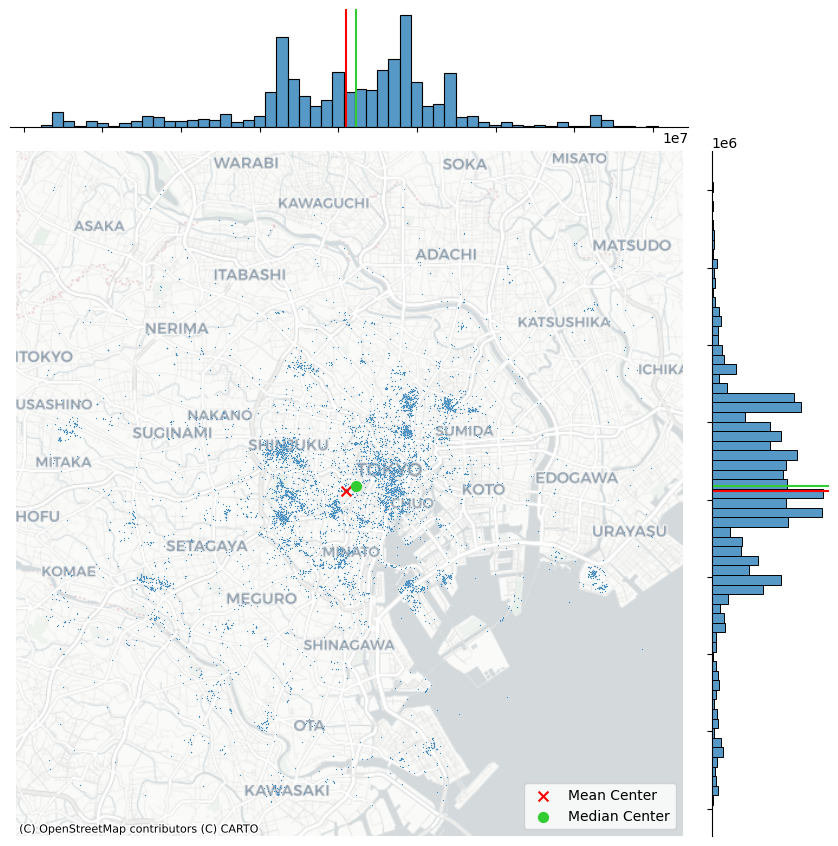

In [21]:
# Generate scatterplot
joint_axes = seaborn.jointplot(
    x="x", y="y", data=db, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color="red", marker="x", s=50, label="Mean Center"
)
joint_axes.ax_marg_x.axvline(mean_center[0], color="red")
joint_axes.ax_marg_y.axhline(mean_center[1], color="red")
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center,
    color="limegreen",
    marker="o",
    s=50,
    label="Median Center"
)
joint_axes.ax_marg_x.axvline(med_center[0], color="limegreen")
joint_axes.ax_marg_y.axhline(med_center[1], color="limegreen")
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [22]:
centrography.std_distance(db[["x", "y"]])

8778.218564382098

In [23]:
major, minor, rotation = centrography.ellipse(db[["x", "y"]])

In [24]:
major

7961.472887138463

In [25]:
minor

8785.957053230712

In [26]:
rotation

1.180298293539531

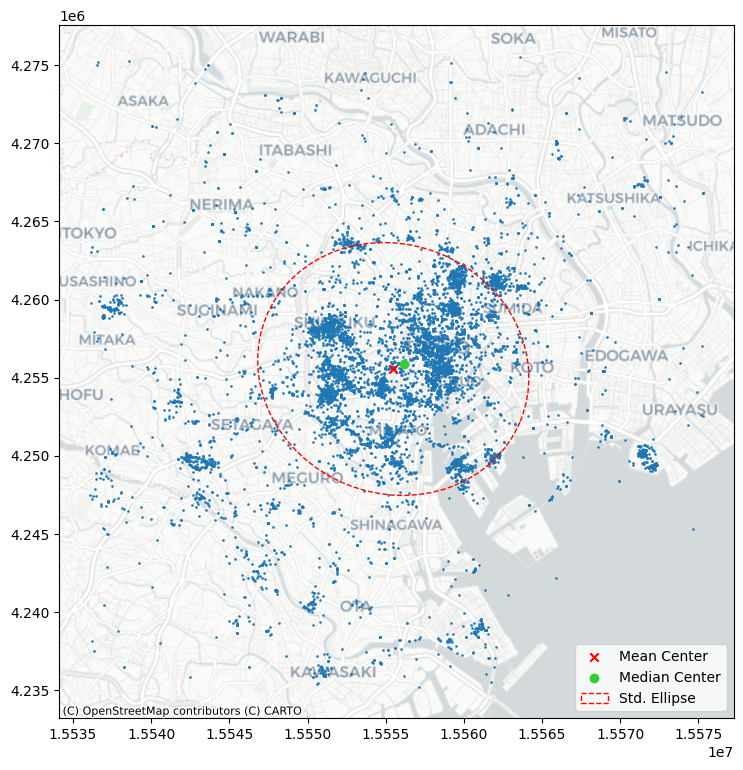

In [27]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(db["x"], db["y"], s=0.75)
ax.scatter(*mean_center, color="red", marker="x", label="Mean Center")
ax.scatter(
    *med_center, color="limegreen", marker="o", label="Median Center"
)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(
    xy=mean_center,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=numpy.rad2deg(
        rotation
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse",
)
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
plt.show()

In [28]:
user = db.query('user_id == "95795770@N00"')
coordinates = user[["x", "y"]].values

In [29]:
convex_hull_vertices = centrography.hull(coordinates)

In [30]:
import libpysal

alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(
    coordinates, return_circles=True
)

C:\Users\bsb5pw\AppData\Local\Temp\ipykernel_22832\771098368.py:53: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend();


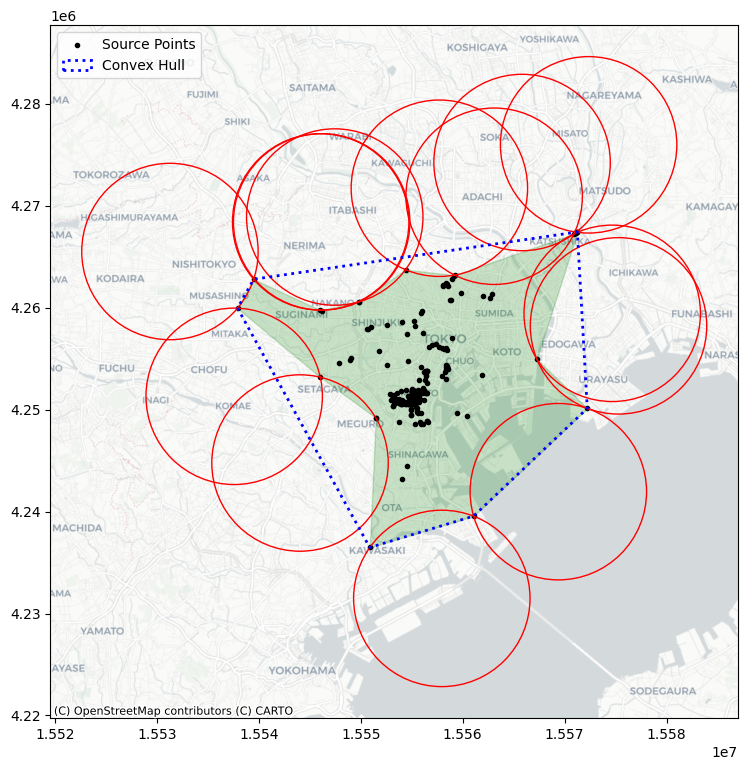

In [31]:
f, ax = plt.subplots(1, 1, figsize=(9, 9))

# Plot a green alpha shape
geopandas.GeoSeries(
    [alpha_shape]
).plot(
    ax=ax,
    edgecolor="green",
    facecolor="green",
    alpha=0.2,
    label="Tightest single alpha shape",
)

# Include the points for our prolific user in black
ax.scatter(
    *coordinates.T, color="k", marker=".", label="Source Points"
)

# plot the circles forming the boundary of the alpha shape
for i, circle in enumerate(circs):
    # only label the first circle of its kind
    if i == 0:
        label = "Bounding Circles"
    else:
        label = None
        ax.add_patch(
            plt.Circle(
                circle,
                radius=alpha,
                facecolor="none",
                edgecolor="r",
                label=label,
            )
        )
        
# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices,
        closed=True,
        edgecolor="blue",
        facecolor="none",
        linestyle=":",
        linewidth=2,
        label="Convex Hull",
    )
)

# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
plt.legend();

In [34]:
from pygeos import minimum_rotated_rectangle, from_shapely, to_shapely

point_array = geopandas.points_from_xy(x=user.x, y=user.y)

min_rot_rect = minimum_rotated_rectangle(
    from_shapely(
        point_array.unary_union()
    )
)
min_rot_rect = to_shapely(min_rot_rect)

In [35]:
min_rect_vertices = centrography.minimum_bounding_rectangle(
    coordinates
)

In [36]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(
    coordinates
)

In [39]:
from matplotlib.patches import Polygon, Circle, Rectangle

# Make a blue convex hull
convex_hull_patch = Polygon(
    convex_hull_vertices,
    closed=True,
    edgecolor="blue",
    facecolor="none",
    linestyle=":",
    linewidth=2,
    label="Convex Hull",
)

# compute the width and height of the minimum bounding rectangle
min_rect_width = min_rect_vertices[2] - min_rect_vertices[0]
min_rect_height = min_rect_vertices[2] - min_rect_vertices[0]

# Make a goldenrod minimum bounding rectangle
min_rect_patch = Rectangle(
    min_rect_vertices[0:2],
    width=min_rect_width,
    height=min_rect_height,
    edgecolor="goldenrod",
    facecolor="none",
    linestyle="dashed",
    linewidth=2,
    label="Min Bounding Rectangle",
)

# and make a red minimum bounding circle
circ_patch = Circle(
    (center_x, center_y),
    radius=radius,
    edgecolor="red",
    facecolor="none",
    linewidth=2,
    label="Min Bounding Circle",
)

C:\Users\bsb5pw\AppData\Local\Temp\ipykernel_22832\1075041300.py:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(ncol=1, loc="center left")


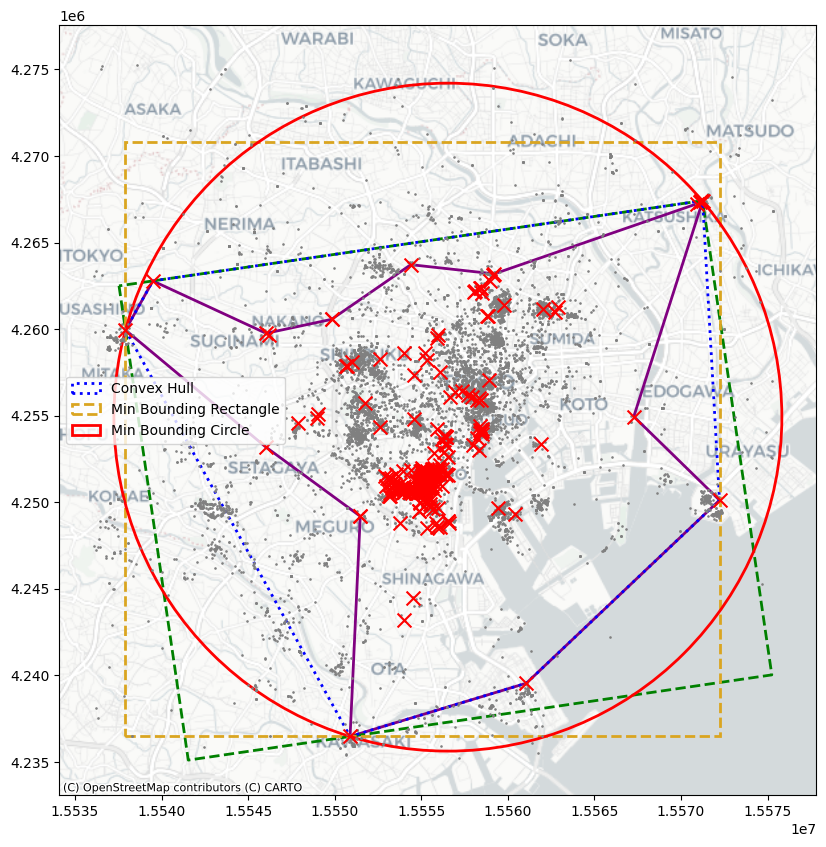

In [40]:
f, ax = plt.subplots(1, figsize=(10, 10))

# a purple alpha shape
geopandas.GeoSeries(
    [alpha_shape]
).plot(
    ax=ax,
    edgecolor="purple",
    facecolor="none",
    linewidth=2,
    label="Alpha Shape",
)

# a green minimum rotated rectangle
geopandas.GeoSeries(
    [min_rot_rect]
).plot(
    ax=ax,
    edgecolor="green",
    facecolor="none",
    linestyle="--",
    label="Min Rotated Rectangle",
    linewidth=2,
)

# add the rest of the patches
ax.add_patch(convex_hull_patch)
ax.add_patch(min_rect_patch)
ax.add_patch(circ_patch)
ax.scatter(db.x, db.y, s=0.75, color="grey")
ax.scatter(user.x, user.y, s=100, color="r", marker="x")
ax.legend(ncol=1, loc="center left")

# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
plt.show()

In [42]:
from pointpats import (
    distance_statistics,
    QStatistic,
    random,
    PointPattern,
)

In [43]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

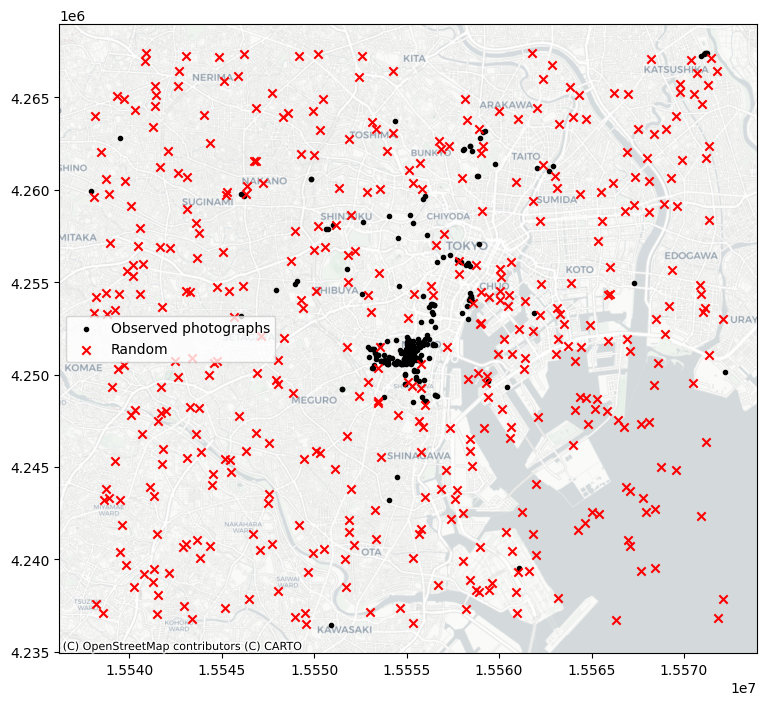

In [44]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(
    *coordinates.T,
    color="k",
    marker=".",
    label="Observed photographs"
)
plt.scatter(*random_pattern.T, color="r", marker="x", label="Random")
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc="center left")
plt.show()

In [45]:
random_pattern_ashape = random.poisson(
    alpha_shape, size=len(coordinates)
)

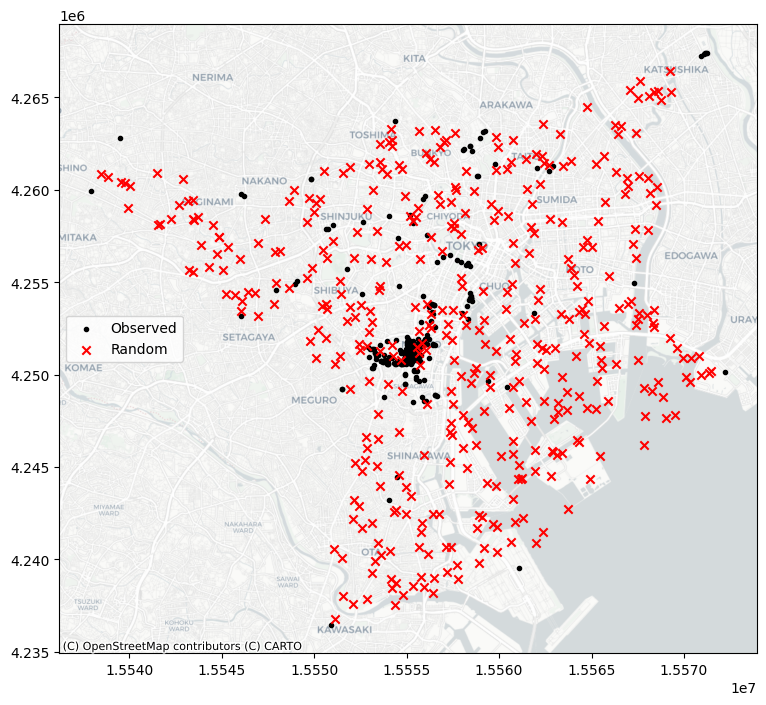

In [46]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color="k", marker=".", label="Observed")
plt.scatter(
    *random_pattern_ashape.T, color="r", marker="x", label="Random"
)
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc="center left")
plt.show()

<Axes: title={'center': 'Quadrat Count'}>

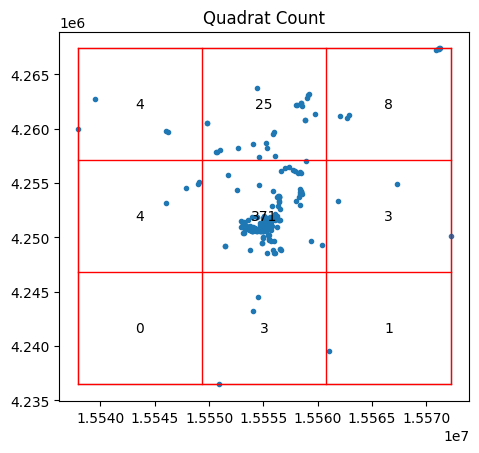

In [47]:
qstat = QStatistic(coordinates)
qstat.plot()

In [48]:
qstat.chi2_pvalue

0.0

<Axes: title={'center': 'Quadrat Count'}>

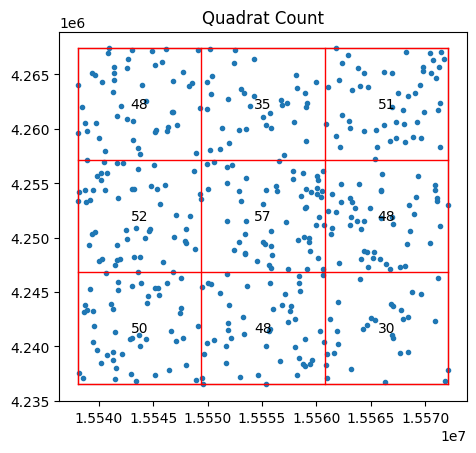

In [51]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [52]:
qstat_null.chi2_pvalue

0.12834096108645662

<Axes: title={'center': 'Quadrat Count'}>

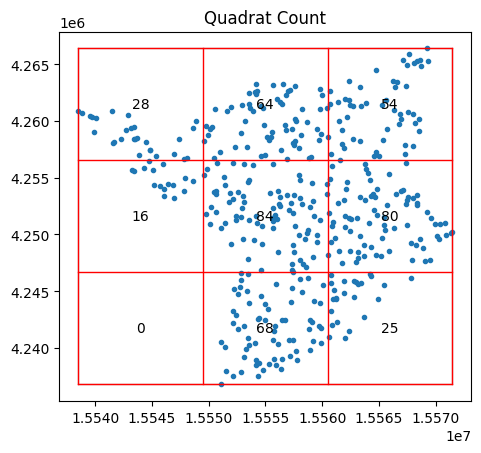

In [53]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

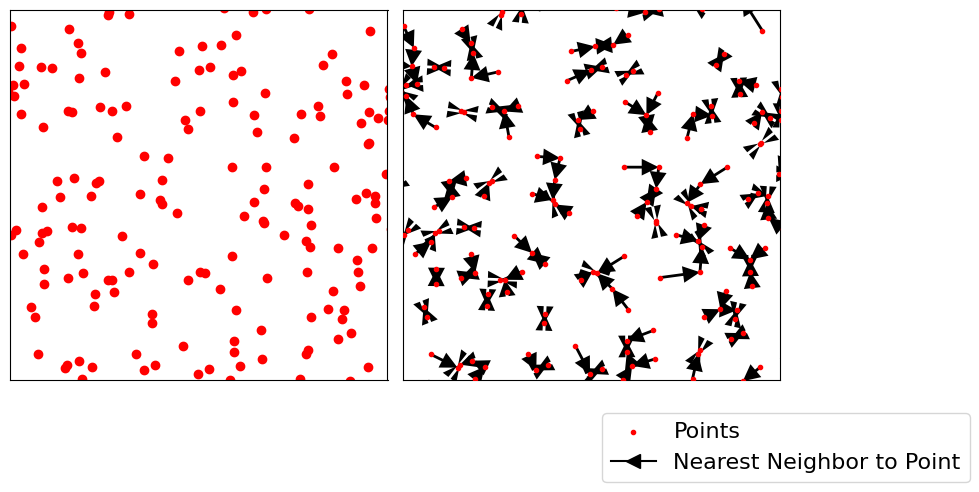

In [54]:
# Code generated for this figure is available on the web version of the book.
f, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax[0].scatter(*random_pattern.T, color="red")
ax[1].scatter(
    *random_pattern.T,
    color="red",
    zorder=100,
    marker=".",
    label="Points"
)
nn_ixs, nn_ds = PointPattern(random_pattern).knn(1)
first = True
for coord, nn_ix, nn_d in zip(random_pattern, nn_ixs, nn_ds):
    dx, dy = random_pattern[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(
        *coord,
        dx,
        dy,
        length_includes_head=True,
        overhang=0,
        head_length=300 * 3,
        head_width=300 * 3,
        width=50 * 3,
        linewidth=0,
        facecolor="k",
        head_starts_at_zero=False
    )
    if first:
        plt.plot(
            (1e100, 1e101),
            (0, 1),
            color="k",
            marker="<",
            markersize=10,
            label="Nearest Neighbor to Point",
        )
    first = False

ax[0].axis([1.554e7, 1.556e7, 4240000, 4260000])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
f.tight_layout()
ax[1].legend(bbox_to_anchor=(0.5, -0.06), fontsize=16)
plt.show()

In [55]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

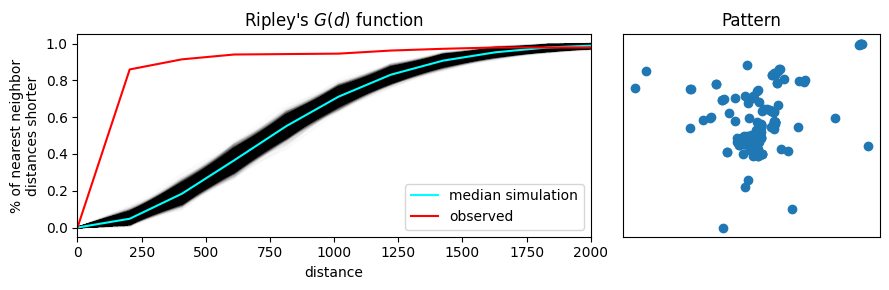

In [56]:
f, ax = plt.subplots(
    1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3))
)
# plot all the simulations with very fine lines
ax[0].plot(
    g_test.support, g_test.simulations.T, color="k", alpha=0.01
)
# and show the average of simulations
ax[0].plot(
    g_test.support,
    numpy.median(g_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's G function
ax[0].plot(
    g_test.support, g_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest neighbor\ndistances shorter")
ax[0].legend()
ax[0].set_xlim(0, 2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()

In [57]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

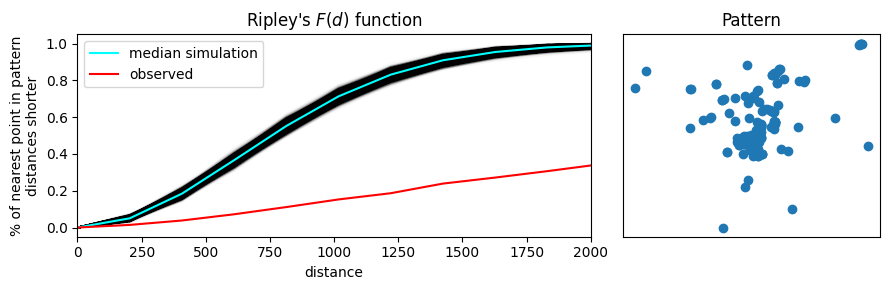

In [58]:
f, ax = plt.subplots(
    1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3))
)

# plot all the simulations with very fine lines
ax[0].plot(
    f_test.support, f_test.simulations.T, color="k", alpha=0.01
)
# and show the average of simulations
ax[0].plot(
    f_test.support,
    numpy.median(f_test.simulations, axis=0),
    color="cyan",
    label="median simulation",
)


# and the observed pattern's F function
ax[0].plot(
    f_test.support, f_test.statistic, label="observed", color="red"
)

# clean up labels and axes
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest point in pattern\ndistances shorter")
ax[0].legend()
ax[0].set_xlim(0, 2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()

In [59]:
# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(db[["x", "y"]])

DBSCAN()

In [60]:
# Print the first 5 elements of `cs`
clusterer.core_sample_indices_[:5]

array([ 1, 22, 30, 36, 42], dtype=int64)

In [61]:
clusterer.labels_[:5]

array([-1,  0, -1, -1, -1], dtype=int64)

In [62]:
lbls = pandas.Series(clusterer.labels_, index=db.index)

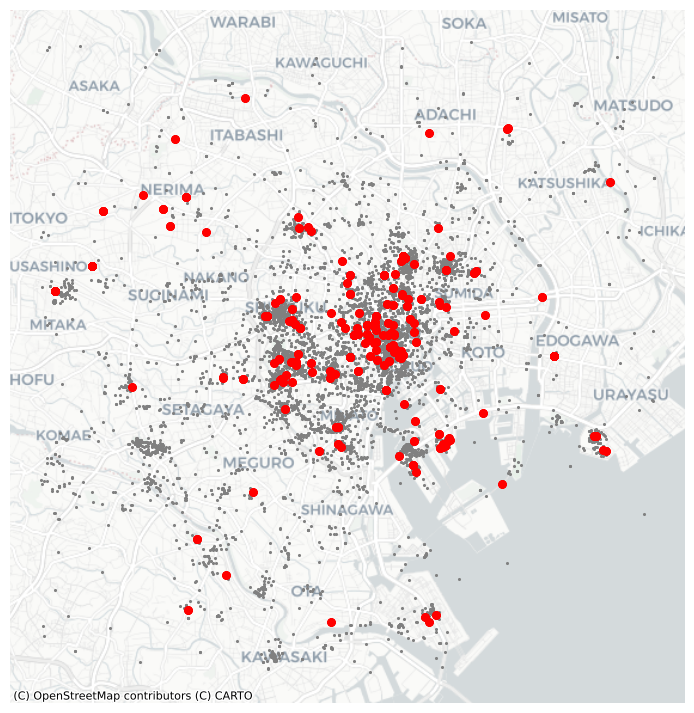

In [63]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls == -1, ["x", "y"]]
# Plot noise in grey
ax.scatter(noise["x"], noise["y"], c="grey", s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(
    db.loc[db.index.difference(noise.index), "x"],
    db.loc[db.index.difference(noise.index), "y"],
    c="red",
    linewidth=0,
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [64]:
# Obtain the number of points 1% of the total represents
minp = numpy.round(db.shape[0] * 0.01)
minp

100.0

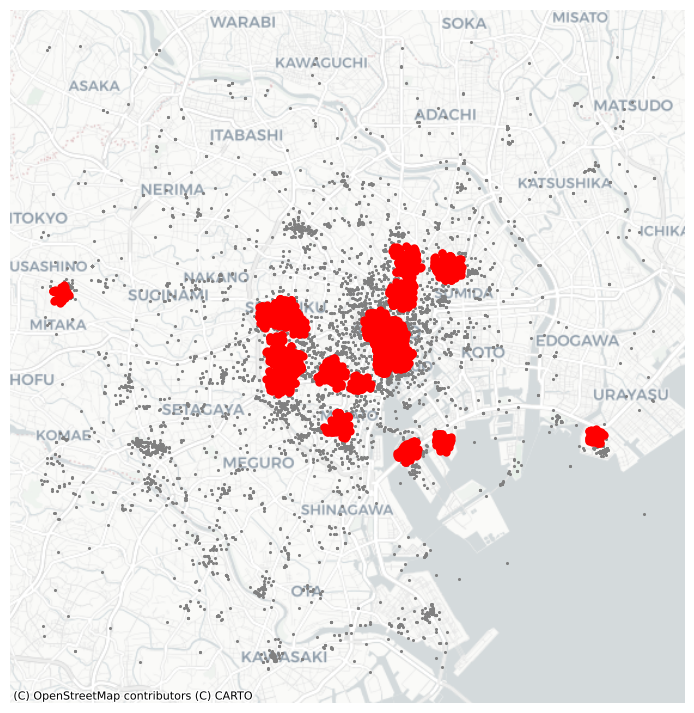

In [65]:
# Rerun DBSCAN
clusterer = DBSCAN(eps=500, min_samples=int(minp))
clusterer.fit(db[["x", "y"]])
# Turn labels into a Series
lbls = pandas.Series(clusterer.labels_, index=db.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls == -1, ["x", "y"]]
# Plot noise in grey
ax.scatter(noise["x"], noise["y"], c="grey", s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db) and substract from
#      it the index of those that are noise
ax.scatter(
    db.loc[db.index.difference(noise.index), "x"],
    db.loc[db.index.difference(noise.index), "y"],
    c="red",
    linewidth=0,
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()